In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-siign-classification/car/README.dataset.txt
/kaggle/input/traffic-siign-classification/car/README.roboflow.txt
/kaggle/input/traffic-siign-classification/car/data.yaml
/kaggle/input/traffic-siign-classification/car/valid/labels.cache
/kaggle/input/traffic-siign-classification/car/valid/labels/000825_jpg.rf.5217db7b554510a418092e5f2aa43864.txt
/kaggle/input/traffic-siign-classification/car/valid/labels/001638_JPG_jpg.rf.2a3d2a331eb8c9bf6afc868c6da103c8.txt
/kaggle/input/traffic-siign-classification/car/valid/labels/road672_png.rf.399722f8bd34dc5991633bbbe681cc47.txt
/kaggle/input/traffic-siign-classification/car/valid/labels/00004_00037_00010_png.rf.2d548b82f656367528a9b69d5b6b82cf.txt
/kaggle/input/traffic-siign-classification/car/valid/labels/00014_00009_00012_png.rf.02ffbac072397fe4f36979ba80f74fb9.txt
/kaggle/input/traffic-siign-classification/car/valid/labels/00014_00010_00001_png.rf.68c586d3ac58ed9ad2b5b51c2702b4cf.txt
/kaggle/input/traffic-siign-classificati

In [13]:
!pip install ultralytics
!pip install -U ipywidgets


import zipfile
import os
import cv2
import wandb

# Login to Weights & Biases
wandb.login(key='0fa191375b7b521942eb19d43936101e848f67de')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ultralytics import YOLO
from IPython.display import Video

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [16]:
!pip install -U ipywidgets


In [4]:
images=[]
dirpath='/kaggle/input/traffic-siign-classification/car/train/images'
def show_samples():
    for file in os.listdir(dirpath):
      filepath=os.path.join(dirpath,file)
      images.append(filepath)
    fig,ax=plt.subplots(5,4,figsize=(10,10))

    for i in range(20):
        index=np.random.randint(0,len(images))
        plt.subplot(5, 4, i + 1)
        img = cv2.imread(images[index])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
        plt.imshow(img)
        plt.axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

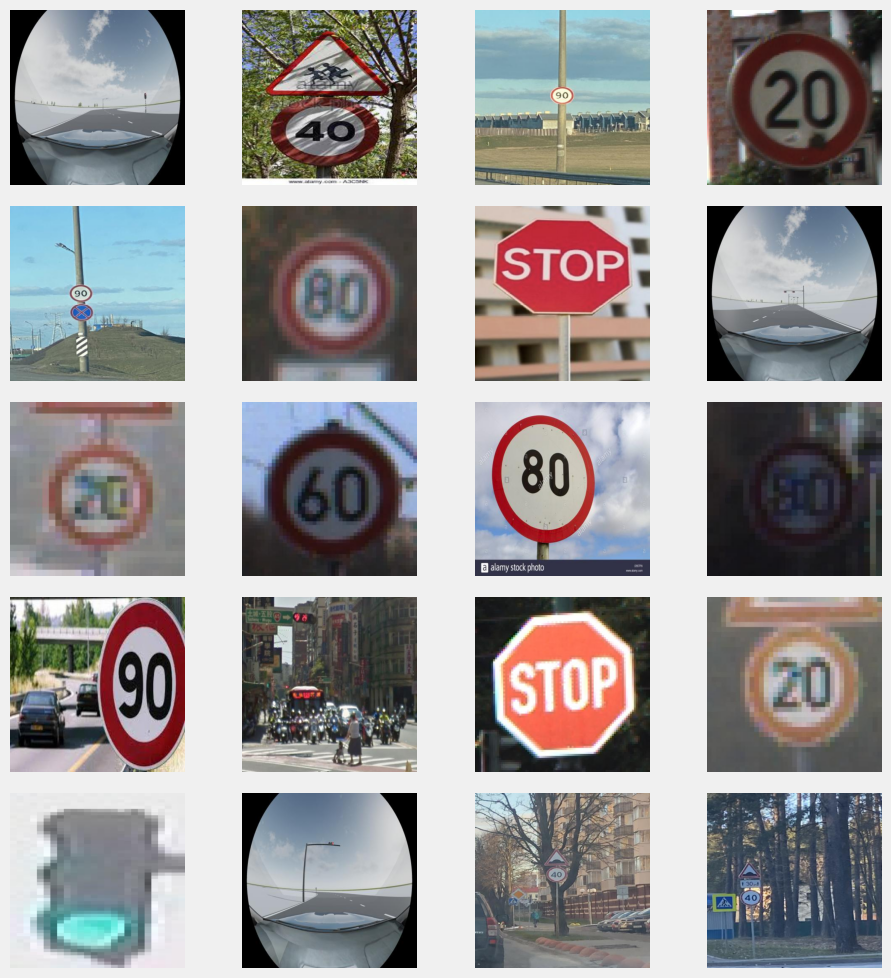

In [5]:
show_samples()

In [6]:
model=YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 91.1MB/s]


In [10]:
# Define dataset paths
data_dir = '/kaggle/input/traffic-siign-classification/car'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Define class names
class_names = [
    'Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110',
    'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50',
    'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop'
]

# Prepare the dataset.yaml file for YOLOv8
dataset_yaml = f"""
path: {data_dir}
train: {train_dir}
val: {val_dir}
test: {test_dir}

names:
{os.linesep.join([f'  {i}: {name}' for i, name in enumerate(class_names)])}
"""

# Save the dataset.yaml file
with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

In [19]:
model.train(data='dataset.yaml',epochs=50, imgsz = 512, batch = 32 ,lr0=0.0001, dropout= 0.15, device = 0)

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

train: Scanning /kaggle/input/traffic-siign-classification/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:03<00:00, 886.39it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-siign-classification/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/traffic-siign-classification/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 867.39it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/traffic-siign-classification/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train3222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/detect/train3222
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.8G       0.57     0.9062     0.9712         20        512: 100%|██████████| 111/111 [02:22<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.678      0.548      0.631      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.1G     0.7332      1.257      1.043         28        512: 100%|██████████| 111/111 [02:00<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.715      0.672      0.752      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.3G     0.7579      1.178      1.054         17        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.735      0.609      0.688      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.1G     0.7482      1.175      1.051         36        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.748      0.656      0.714      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.4G     0.7332      1.091       1.04         29        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.774       0.71      0.783      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.1G     0.6978     0.9835      1.031         26        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.822      0.764      0.833      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.4G      0.686     0.9264      1.022         24        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.821      0.772      0.836      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.1G      0.683     0.8864       1.02         18        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.888      0.797      0.875      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.3G     0.6611     0.8697      1.019         35        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.866      0.814      0.873      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.1G      0.647     0.8381      1.003         27        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.938      0.816      0.901      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.3G     0.6392     0.7933      1.002         17        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.945      0.845      0.911      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.1G     0.6231     0.7698     0.9962         20        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.932      0.851      0.911      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.3G     0.6124     0.7397     0.9884         34        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.929      0.816      0.904      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.1G     0.6077     0.7282      0.989         22        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.948      0.857      0.923      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.4G     0.5961     0.7107     0.9818         18        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.925      0.846      0.907      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.1G     0.6015     0.7049     0.9858         22        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.943      0.863       0.93      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.3G     0.5872     0.6776     0.9779         23        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.931       0.86      0.924      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.1G     0.5792     0.6678     0.9745         21        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.933      0.876      0.937      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.4G     0.5642     0.6336     0.9666         20        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.916      0.884      0.935      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.1G      0.574      0.648     0.9714         17        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.952       0.88      0.941      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.3G     0.5667     0.6275     0.9664         25        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.951      0.879      0.942      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.1G     0.5648     0.6018     0.9609         19        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.946      0.873      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.3G     0.5628     0.6054     0.9687         30        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.956      0.866      0.939       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.1G     0.5533     0.5899     0.9627         19        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.956      0.897      0.946      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.3G      0.545     0.5884     0.9582         28        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        801        944      0.965      0.881      0.947      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.1G     0.5377     0.5799     0.9596         21        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.942      0.901      0.945      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.3G     0.5361     0.5617     0.9544         25        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.957      0.901      0.953      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.1G     0.5514     0.5779     0.9589         24        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.928      0.884      0.941      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.3G     0.5234     0.5584     0.9498         22        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.959      0.905      0.954      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.1G     0.5267     0.5527     0.9532         18        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.952      0.916      0.958      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.3G     0.5256     0.5501     0.9568         30        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.945      0.917      0.952      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.1G     0.5223     0.5367     0.9448         28        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.948      0.897      0.951      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.3G     0.5128     0.5117     0.9444         19        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.959      0.916      0.958      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      13.1G     0.5105     0.5153     0.9445         19        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.955      0.913      0.957      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.3G     0.5151     0.5209     0.9458         18        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        801        944      0.942      0.905      0.953       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.1G      0.499      0.499     0.9402         22        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.951      0.915      0.957       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.3G     0.4914     0.4833     0.9365         25        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.953      0.924      0.958      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      13.1G     0.4887     0.4788     0.9381         23        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.961      0.916       0.96      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.3G     0.4947     0.4864     0.9382         20        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.957      0.912      0.959      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      13.1G     0.4801     0.4657      0.929         24        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        801        944      0.956      0.911      0.959      0.833


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.3G     0.4844     0.2773      0.907         13        512: 100%|██████████| 111/111 [02:00<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.952      0.916      0.961      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.1G     0.4791     0.2724     0.8964         14        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.956      0.923      0.962      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.4G     0.4635     0.2669     0.8895         11        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.947      0.926       0.96      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      13.1G     0.4592     0.2582     0.8861         10        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.948       0.93      0.963      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.3G      0.458      0.256     0.8879         12        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.961      0.935      0.966      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      13.1G     0.4467     0.2468     0.8794         10        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.958      0.926      0.964      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.3G     0.4409     0.2409       0.88         13        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.953      0.924      0.962      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      13.1G      0.437     0.2363     0.8758         14        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.947      0.928      0.964      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.3G     0.4334     0.2321     0.8782         14        512: 100%|██████████| 111/111 [02:00<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]

                   all        801        944      0.943      0.931      0.963      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.1G     0.4303     0.2252     0.8769         13        512: 100%|██████████| 111/111 [01:59<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        801        944      0.937      0.939      0.964      0.849



50 epochs completed in 1.861 hours.
Optimizer stripped from runs/detect/train3222/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train3222/weights/best.pt, 87.7MB

Validating runs/detect/train3222/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,618,173 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]


                   all        801        944      0.937      0.939      0.965      0.849
           Green Light         87        122      0.852      0.754      0.849      0.545
             Red Light         74        108      0.807      0.796      0.819      0.509
       Speed Limit 100         52         52      0.941          1      0.993       0.93
       Speed Limit 110         17         17      0.844      0.952      0.978      0.913
       Speed Limit 120         60         60      0.976      0.983      0.995      0.936
        Speed Limit 20         56         56      0.974      0.982      0.987      0.879
        Speed Limit 30         71         74      0.928      0.986      0.992      0.937
        Speed Limit 40         53         55      0.919      0.982      0.986      0.889
        Speed Limit 50         68         71          1      0.954      0.989      0.896
        Speed Limit 60         76         76      0.994      0.947      0.983      0.914
        Speed Limit 7

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ff0dc5a92a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [20]:
def display_images(training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

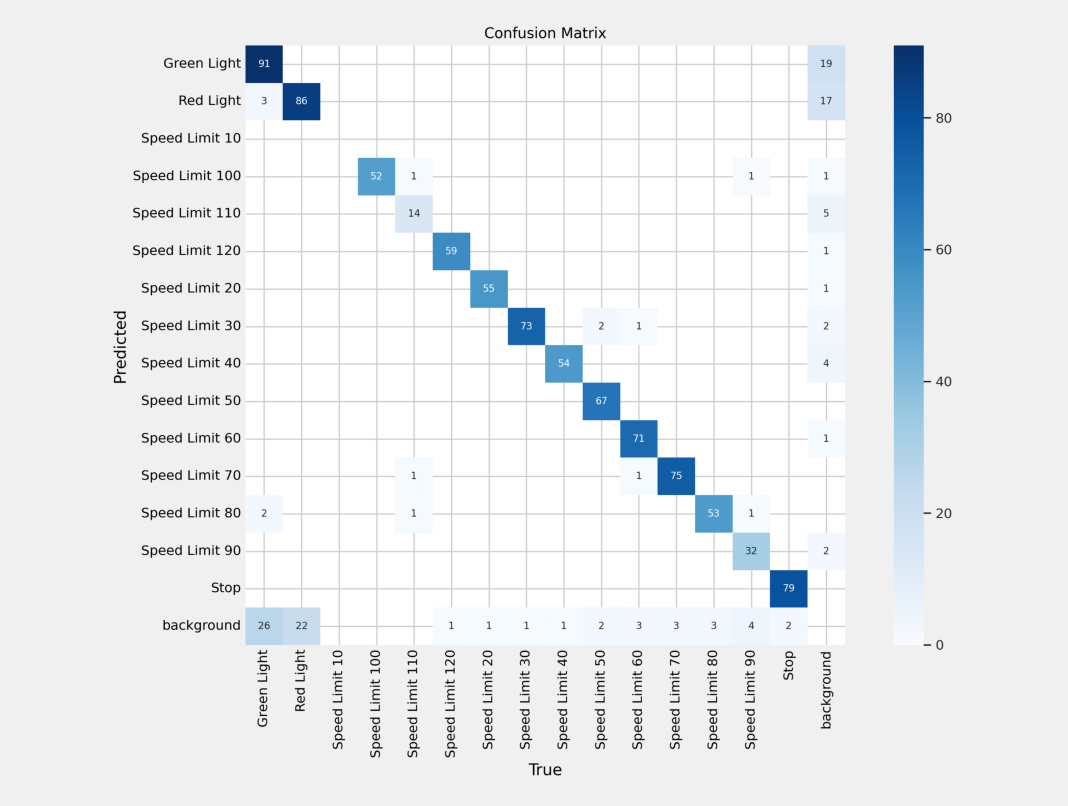

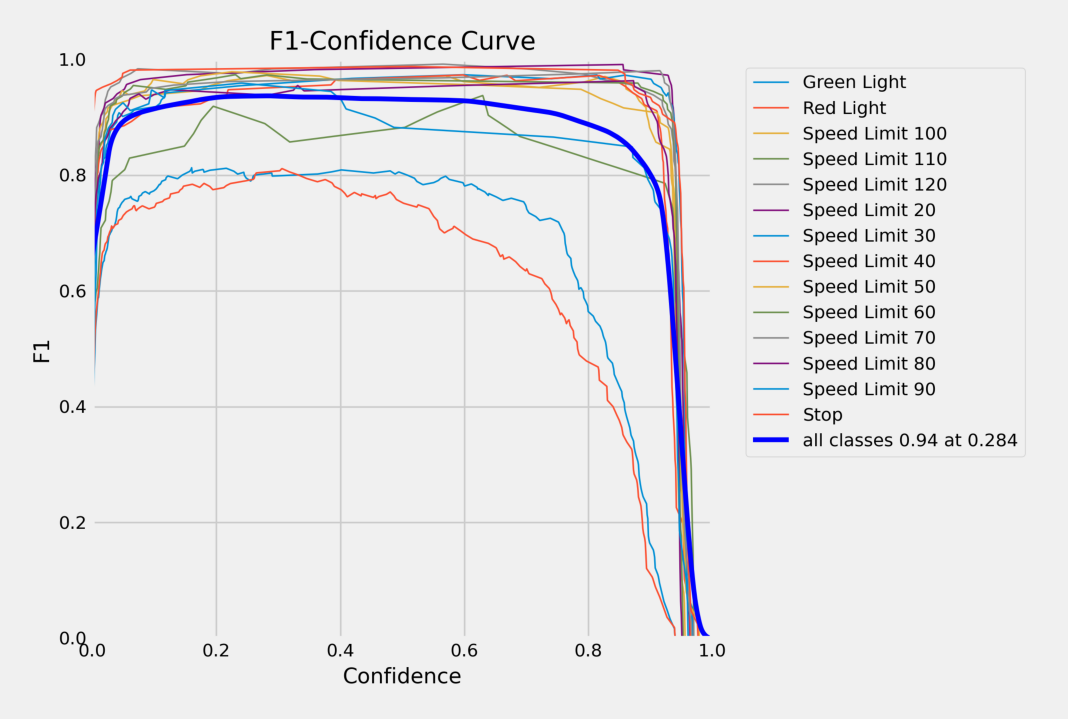

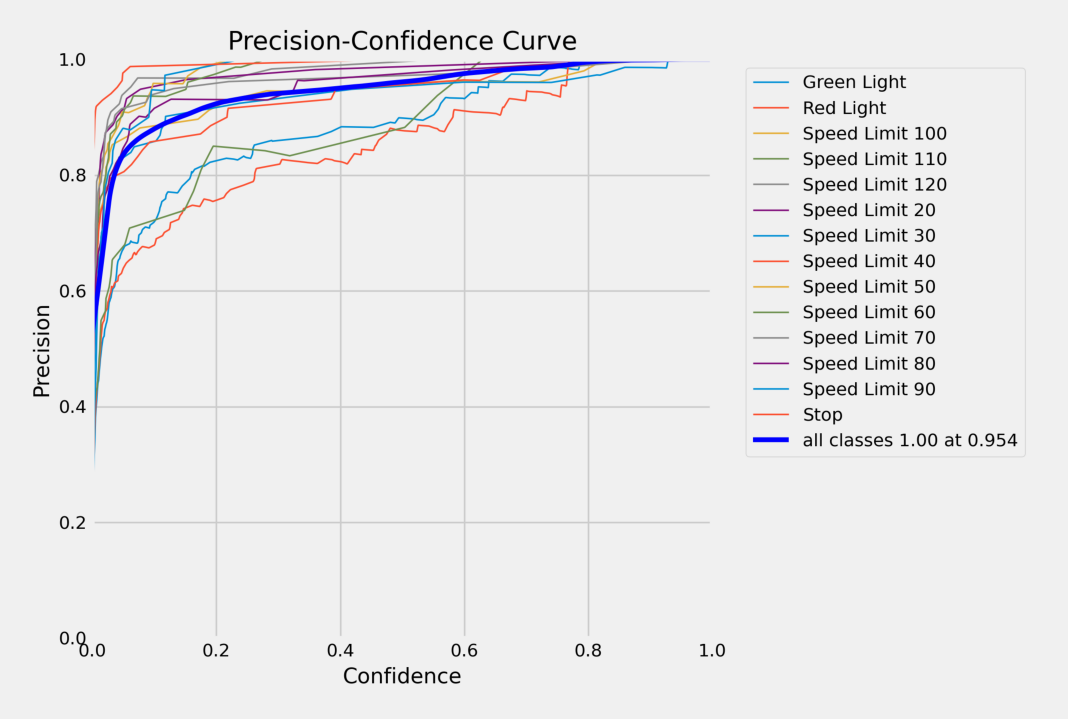

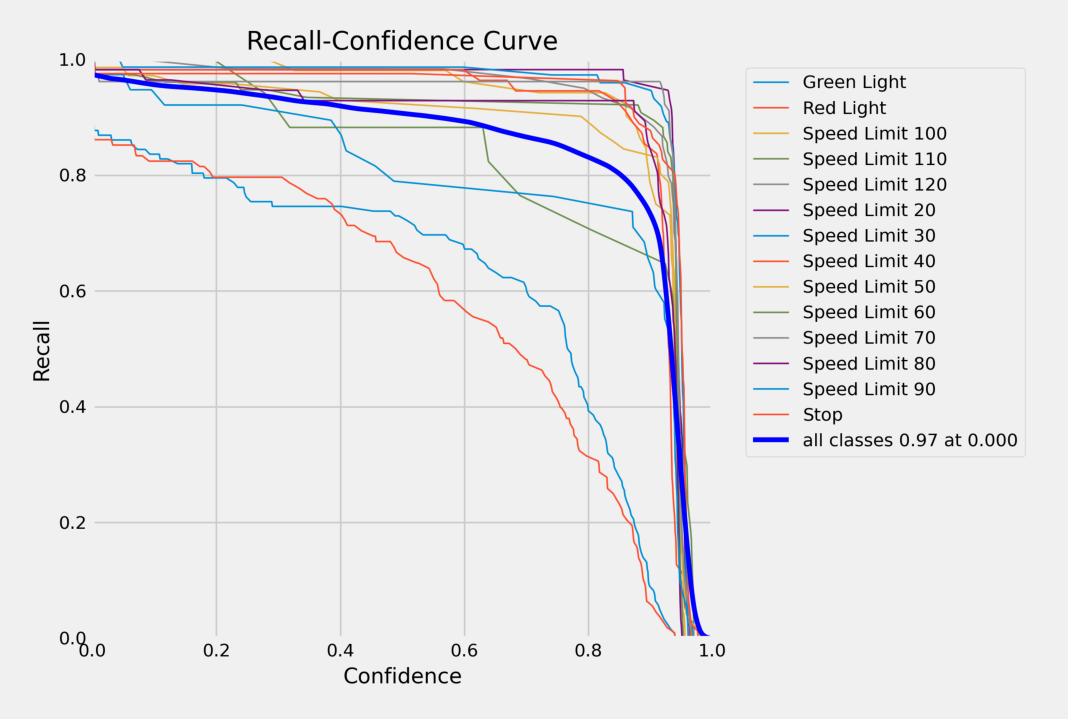

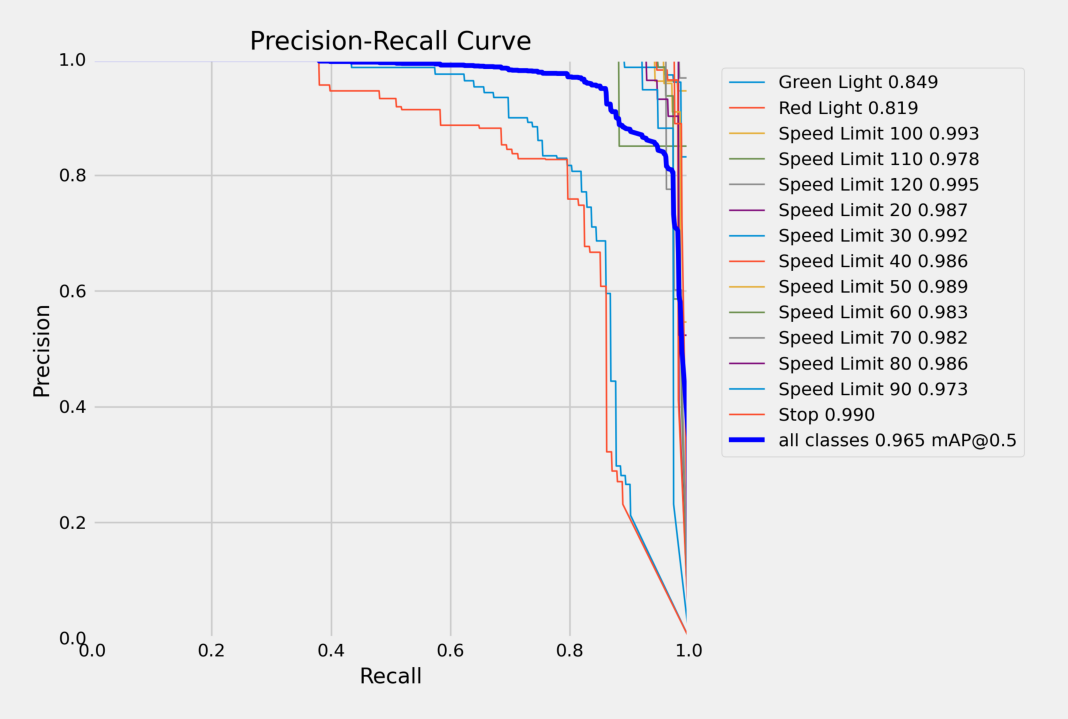

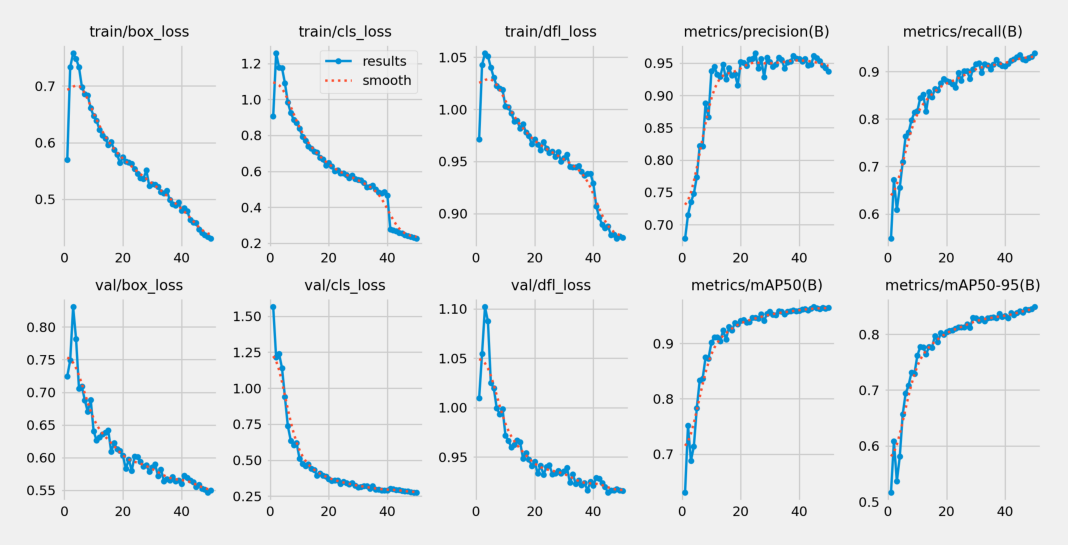

In [28]:
image_files = [
    'confusion_matrix.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train3222'

# Display the images
display_images(post_training_files_path, image_files)

In [30]:
Result_Final_model=pd.read_csv('/kaggle/working/runs/detect/train3222/results.csv')

In [31]:
Result_Final_model.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
45     46  6164.10         0.44670         0.24684         0.87945   
46     47  6297.38         0.44095         0.24085         0.87997   
47     48  6430.93         0.43701         0.23634         0.87585   
48     49  6564.16         0.43338         0.23214         0.87816   
49     50  6697.69         0.43029         0.22522         0.87691   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
45               0.95823            0.92600           0.96379   
46               0.95300            0.92377           0.96185   
47               0.94670            0.92815           0.96444   
48               0.94256            0.93094           0.96300   
49               0.93726            0.93857           0.96449   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
45              0.83857       0.55877       0.28298       0.91634  0.000057   
46              0.84446       0.55274       0.28377       0.91634  0.000047   
47              0.84394       0.55114       0.27690       0.91750  0.000037   
48              0.84550       0.54668       0.27586       0.91629  0.000026   
49              0.84869       0.54973       0.27522       0.91589  0.000016   

      lr/pg1    lr/pg2  
45  0.000057  0.000057  
46  0.000047  0.000047  
47  0.000037  0.000037  
48  0.000026  0.000026  
49  0.000016  0.000016

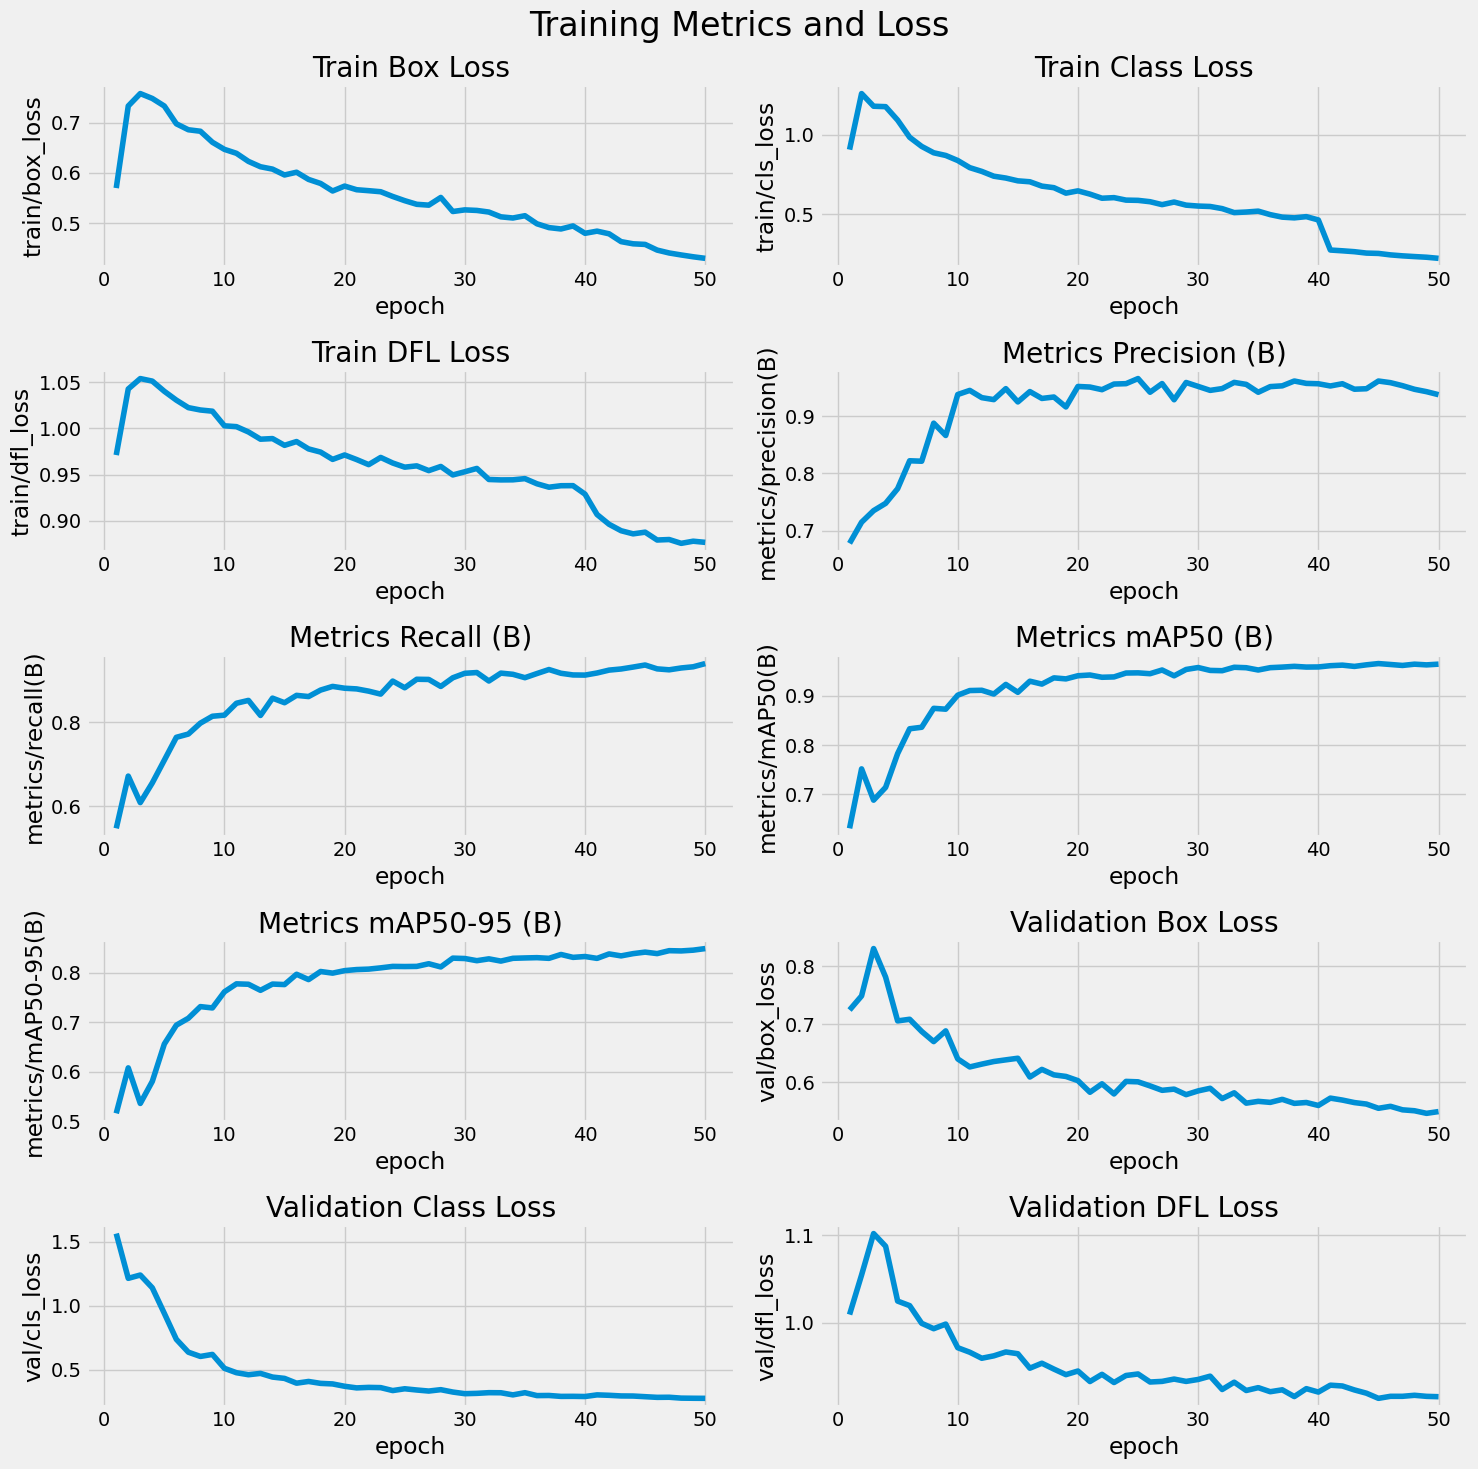

In [32]:
Result_Final_model.columns = Result_Final_model.columns.str.strip()
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [33]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train3222/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')
results=pd.DataFrame(columns=["metrics/precision(B)","metrics/recall(B)","metrics/mAP50(B)","metrics/mAP50-95(B)"])
precision = metrics.results_dict["metrics/precision(B)"]
recall =  metrics.results_dict["metrics/recall(B)"]
map50 = metrics.results_dict["metrics/mAP50(B)"]
map50_95 = metrics.results_dict["metrics/mAP50-95(B)"]
results.loc[0]=[precision,recall,map50,map50_95]
results
# print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
# print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
# print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
# print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 268 layers, 43,618,173 parameters, 0 gradients, 164.9 GFLOPs


val: Scanning /kaggle/input/traffic-siign-classification/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 891.79it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-siign-classification/car/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.69it/s]


                   all        801        944      0.938      0.938      0.964      0.849
           Green Light         87        122      0.853      0.754       0.85      0.543
             Red Light         74        108       0.81      0.796      0.819      0.504
       Speed Limit 100         52         52      0.941          1      0.993      0.929
       Speed Limit 110         17         17      0.843      0.949      0.978      0.913
       Speed Limit 120         60         60      0.977      0.983      0.995      0.927
        Speed Limit 20         56         56      0.974      0.982      0.987      0.879
        Speed Limit 30         71         74      0.928      0.986      0.992      0.938
        Speed Limit 40         53         55       0.92      0.982      0.986      0.889
        Speed Limit 50         68         71          1      0.954      0.989      0.897
        Speed Limit 60         76         76      0.995      0.947      0.983      0.913
        Speed Limit 7

metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0              0.937691           0.938324          0.964498   

   metrics/mAP50-95(B)  
0             0.848808


image 1/1 /kaggle/input/traffic-siign-classification/car/test/images/000664_jpg.rf.882fdd90b90c7f1af1fc37a7467443cf.jpg: 416x416 1 Speed Limit 50, 1 Speed Limit 80, 17.1ms
Speed: 1.6ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/traffic-siign-classification/car/test/images/000822_jpg.rf.63b8e6ec737487b4e7e9e2ed48754226.jpg: 416x416 1 Speed Limit 90, 17.2ms
Speed: 1.1ms preprocess, 17.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/traffic-siign-classification/car/test/images/001051_jpg.rf.bb8152d7d7c35ed73bfc9239185f9087.jpg: 416x416 2 Speed Limit 100s, 1 Speed Limit 80, 17.1ms
Speed: 0.9ms preprocess, 17.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/traffic-siign-classification/car/test/images/00014_00023_00018_png.rf.7f4df748842e9a2b90d343c5612ff812.jpg: 416x416 1 Stop, 17.2ms
Speed: 0.8ms preprocess, 17.2ms inference, 1.4ms p

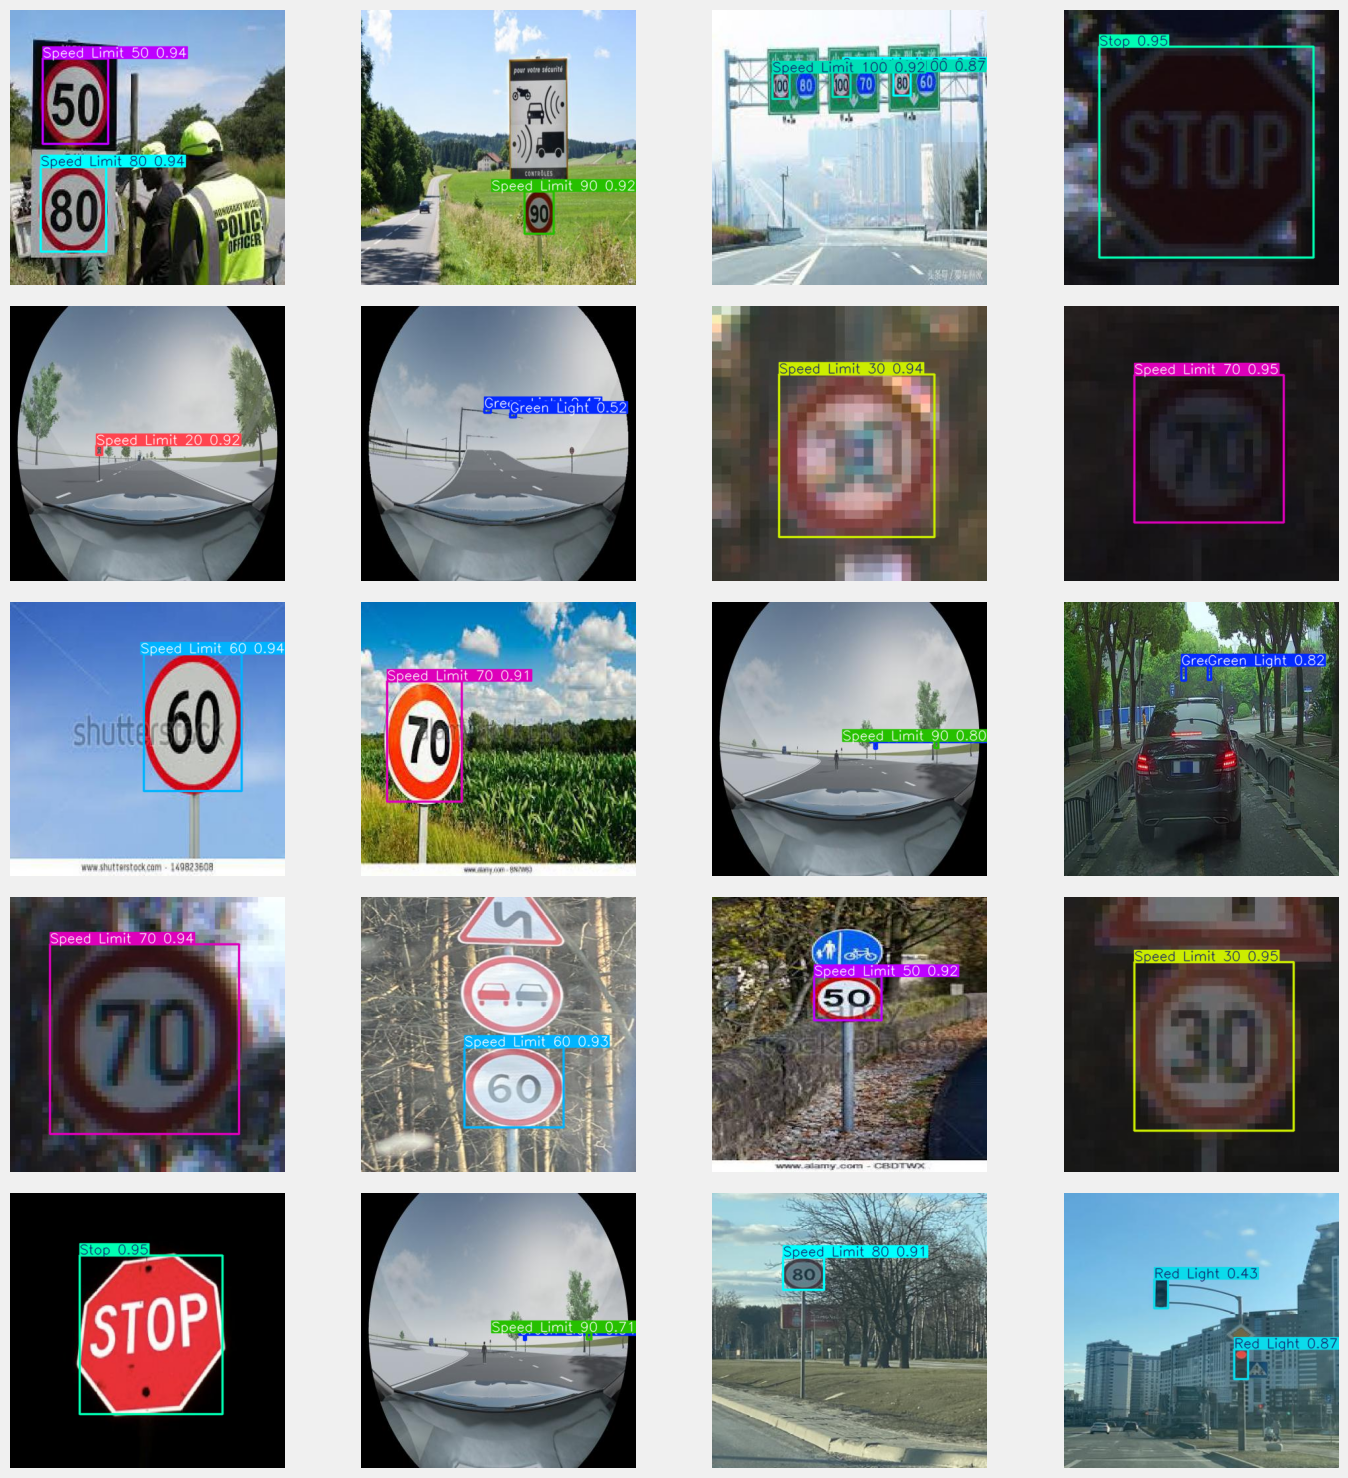

In [34]:
data_dir = '/kaggle/input/traffic-siign-classification/car/test'
test_dir = os.path.join(data_dir, 'images')
images=os.listdir(test_dir)
# show results
images = images[:20]

# Show results
fig, ax = plt.subplots(5, 4, figsize=(15, 15))
for i, image_name in enumerate(images):
    image_path = os.path.join(test_dir, image_name)
    result_predict = Valid_model.predict(source=image_path, imgsz=(416))
    plot = result_predict[0].plot()
    
    plt.subplot(5, 4, i + 1)
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    plt.imshow(plot)
    plt.axis('off')  # Hide the axes for better visualization

plt.tight_layout()
plt.show()